In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(train_images, _), (_, _) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

# Define a simple generator model
generator = Sequential([
    Dense(128, input_shape=(100,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(28 * 28, activation='sigmoid'),
    Reshape((28, 28, 1))
])

# Define a discriminator model
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation=LeakyReLU(0.2)),
    Dense(128, activation=LeakyReLU(0.2)),
    Dense(1, activation='sigmoid')
])

# Compile the models
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
gan = Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Training parameters
batch_size = 64
epochs = 1000
sample_interval = 1000

# Training loop
for epoch in range(epochs):
    # Train the discriminator
    random_indices = np.random.randint(0, train_images.shape[0], batch_size)
    real_images = train_images[random_indices]
    real_labels = np.ones((batch_size, 1))
    
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)
    generated_labels = np.zeros((batch_size, 1))

    real_loss = discriminator.train_on_batch(real_images, real_labels)
    generated_loss = discriminator.train_on_batch(generated_images, generated_labels)
    discriminator_loss = 0.5 * np.add(real_loss, generated_loss)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_labels = np.ones((batch_size, 1))

    generator_loss = gan.train_on_batch(noise, valid_labels)

    # Print progress
    if epoch % sample_interval == 0:
        print(f"Epoch {epoch}, D Loss: {discriminator_loss}, G Loss: {generator_loss}")

        # Save the generator model
        generator.save('generator_model.h5')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2/2 [==============================] - 3s 5ms/step
Epoch 0, D Loss: 1.379408836364746, G Loss: 0.8825141191482544
2/2 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 60ms/step


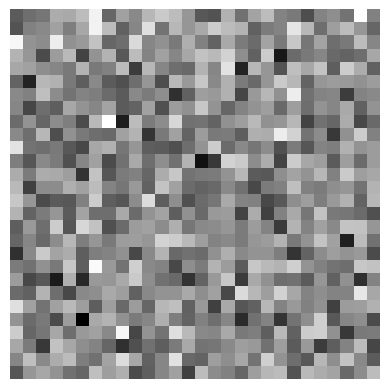

In [2]:
# Load the trained generator model
generator = tf.keras.models.load_model('generator_model.h5')

# Generate a single image
noise = np.random.normal(0, 1, (1, 100))  # Generate random noise
generated_image = generator.predict(noise)  # Generate an image

# Rescale the pixel values from [0, 1] to [0, 255] for displaying
generated_image = (generated_image * 255).astype('uint8')

# Plot the generated image
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()